In [2]:
import sys
import os
src_path = os.path.join(os.getcwd(), '..')
sys.path.append(src_path)

import torch
import torch.nn as nn
import torchvision as tv
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import random

from src.image_processing import  RandomCropResizeTransform
from src.models import VariationalAutoencoder
from src.train_and_eval import kl_loss, train, plot_loss_values

In [3]:
transforms = [
    tv.transforms.Grayscale(),
    tv.transforms.ToTensor(),
    v2.RandomHorizontalFlip(0.5),
    v2.ColorJitter(0.2, 0.2, 0.2, 0.2),
    RandomCropResizeTransform(38, 64, 0.5)
]
ds1 = tv.datasets.ImageFolder(
    root="./../data/cats1",
    transform=tv.transforms.Compose(transforms)
)
ds2 = tv.datasets.ImageFolder(
    root="./../data/cats2/data",
    transform=tv.transforms.Compose(transforms)
)
ds = torch.utils.data.ConcatDataset([ds1, ds2])
dl = torch.utils.data.DataLoader(
    ds,
    batch_size=32,
    shuffle=True
)

In [8]:
vae = VariationalAutoencoder(
    input_shape=(1, 64, 64),
    latent_space_dim=128,
    encoder_conv_channels=(16, 32, 32, 64, 64),
    encoder_conv_kernel_size=(3, 3, 3, 3, 3),
    encoder_conv_stride=(2, 2, 2, 2, 2),
    encoder_conv_padding=(1, 1, 1, 1, 1),
    decoder_conv_t_channels=(64, 32, 16, 16, 1),
    decoder_conv_t_kernel_size=(3, 3, 3, 3, 3),
    decoder_conv_t_stride=(2, 2, 2, 2, 2),
    decoder_conv_t_padding=(1, 1, 1, 1, 1)
)
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-4)

In [9]:
mse = nn.MSELoss()

In [10]:
def beta_fn(kl_loss, epoch):
    return 0.0001 * (epoch+1)

In [11]:
history = train(dl, vae, mse, beta_fn, optimizer, epochs=4)

Epoch 1


100%|██████████| 1505/1505 [00:50<00:00, 29.98batch/s, beta=0.0001, kl_loss=53, reconstruction_loss=0.0447, vae_loss=0.05]      


Train reconstruction loss: 0.058209
Train kl loss: 17.243499
Train vae loss: 0.059934

Epoch 2


100%|██████████| 1505/1505 [00:50<00:00, 29.53batch/s, beta=0.0002, kl_loss=41.1, reconstruction_loss=0.0578, vae_loss=0.066] 


Train reconstruction loss: 0.048405
Train kl loss: 33.778143
Train vae loss: 0.055161

Epoch 3


100%|██████████| 1505/1505 [00:51<00:00, 29.25batch/s, beta=0.0003, kl_loss=21.2, reconstruction_loss=0.0483, vae_loss=0.0546]


Train reconstruction loss: 0.050799
Train kl loss: 21.865965
Train vae loss: 0.057359

Epoch 4


100%|██████████| 1505/1505 [00:53<00:00, 27.94batch/s, beta=0.0004, kl_loss=14.9, reconstruction_loss=0.0464, vae_loss=0.0524]

Train reconstruction loss: 0.053214
Train kl loss: 14.866390
Train vae loss: 0.059161

Done!


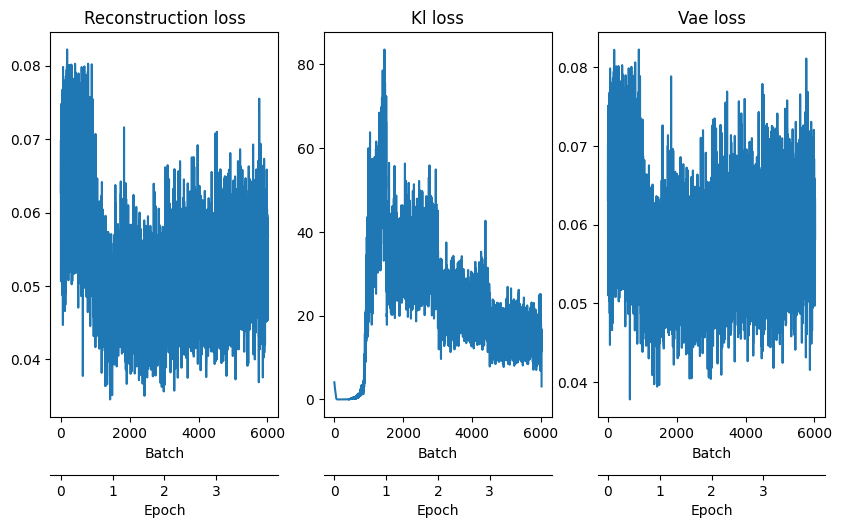

In [13]:
plot_loss_values(history)